# COMP 551 - Mini Project 4 (Group 60)

**The goal of this assignment is to select a paper and reproduce the results of the paper by following the exact methods mentioned in the paper.**

Visualizing Data using t-SNE:

https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwAR3zw3icmhsh4ltr00Ix1_p2fjoLV7AG5WgDny0LIqrMU9uC1WB0dvdjyYc

Implementation reference:

https://github.com/shivanichander/tSNE?fbclid=IwAR1OLRKdyJuHYWCVcVOalviy0LYEGB2ifF5fXNXCg4D48AjmcEmZtCeCxqM

https://github.com/oreillymedia/t-SNE-tutorial

In [ ]:
!pip install umap-learn

In [ ]:
#Import numpy
import numpy as np

from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.manifold import Isomap 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import MDS

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

# tensorflow
import tensorflow as tf

from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

import umap.umap_ as umap

# set the seed for reproducibility
np.random.seed(1234)

## Task 1: Acquire the data

In [ ]:
(MNIST_x_train, MNIST_y_train), (MNIST_x_test, MNIST_y_test) = tf.keras.datasets.mnist.load_data()
# randomly select 6000 data from the training data set for complexity reason as the original paper
index = np.random.choice(60000,6000)
MNIST_x_train = MNIST_x_train[index]
MNIST_y_train = MNIST_y_train[index]

# vectorize data to 2D: # of data x image pixels
MNIST_x_train_vec = MNIST_x_train.reshape(MNIST_x_train.shape[0], MNIST_x_train.shape[1] * MNIST_x_train.shape[2]).astype('float64')

# use PCA to reduce the dimensionality to 30 as the original paper
pca = PCA(n_components=30)
MNIST_x_train_reduced = pca.fit_transform(MNIST_x_train_vec)
print(MNIST_x_train_reduced.shape) 


# plt.gray();
# #Displaying what the standard images look like
# for i in range(0,3):
#     plt.imshow(MNIST_x_train[i, :, :]) 
#     plt.show()

11493376/11490434 [==============================] - 0s 0us/step
(6000, 30)


## Task 2: Run the experiments

Choose a subset of the experiments that’s feasible for you to reproduce in terms of computation resources. Some state of the art models can demand higher computation power than you have access to. In such cases, you might want to reproduce only the baseline model described in the paper. Often hyper-parameter search on the baseline models has not been performed well and there can be a better model than the one reported in the paper.












### Task 2.1: Reproducing the results
Reproduce the results reported in the paper by running the code provided by the authors or by implementing on your own, if no code is available.

Here, we compare t-SNE, Sammon mapping, isomap, and LLE (as in the original paper).  We also compare t-SNE to UMAP, a new visualization method.

In [ ]:
# reference: https://github.com/shivanichander/tSNE?fbclid=IwAR1OLRKdyJuHYWCVcVOalviy0LYEGB2ifF5fXNXCg4D48AjmcEmZtCeCxqM

#So, here is a utility function that helps to do a scatter plot of thee transformed data 

def plot(x, colors, title="title"):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    plt.title(title)
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

#### t-SNE

In [ ]:
#Implementing the TSNE Function using sklearn
# use perp=40 for the cost function parameter as the original paper
TSNE_digits_final = TSNE(perplexity=40,random_state=1234).fit_transform(MNIST_x_train_reduced) 

# plot the visualized data graph using TSNE
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=40")

#### Sammon mapping

(<Figure size 576x576 with 1 Axes>,
 [Text(-866.2024327418515, 1563.645834334794, '0'),
  Text(-161.89510634336892, -1399.0015810065713, '1'),
  Text(-74.27757176572764, -165.87045777477883, '2'),
  Text(-1385.4469118683865, -335.4246172264101, '3'),
  Text(1046.3427495034448, 385.1585579235462, '4'),
  Text(-683.0136562084513, 214.409334949792, '5'),
  Text(-47.029081296837234, 893.9546757381113, '6'),
  Text(1266.3445555136796, -458.625673415655, '7'),
  Text(-324.78380672698154, -465.33358216828356, '8'),
  Text(990.5677376374865, 71.6661418508866, '9')])

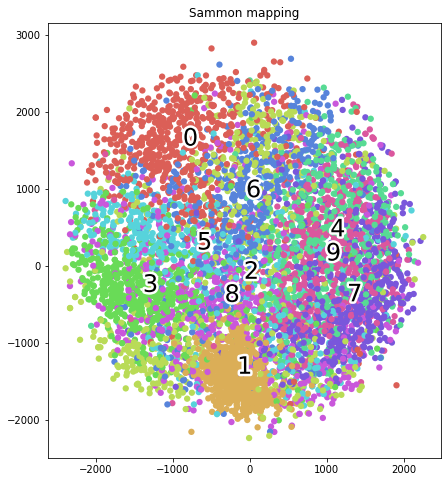

In [ ]:
#Implementing the Sammon mapping Function using sklearn
MDS_digits_final = MDS().fit_transform(MNIST_x_train_reduced) 

# plot the visualized data graph using TSNE
plot(MDS_digits_final,MNIST_y_train,"Sammon mapping")

#### Isomap
Complexity of Isomap is O[Dlog(k)Nlog(N)]+O[N^2(k+log(N))]+O[dN^2].


(<Figure size 576x576 with 1 Axes>,
 [Text(3423.987034921807, 1313.2086332870906, '0'),
  Text(-1485.7630594572097, -1347.6181029218837, '1'),
  Text(-339.37022031556785, -593.147080515736, '2'),
  Text(1155.580886333341, -1979.3565568118847, '3'),
  Text(-1499.6122571763244, 1409.2109729867666, '4'),
  Text(824.5871977245994, -374.98838638305995, '5'),
  Text(1242.3702449165612, 493.31899746572617, '6'),
  Text(-1669.195009243677, 1160.8820005716839, '7'),
  Text(-597.437755213043, -1302.4063335715375, '8'),
  Text(-1554.635445962194, 1084.215680201462, '9')])

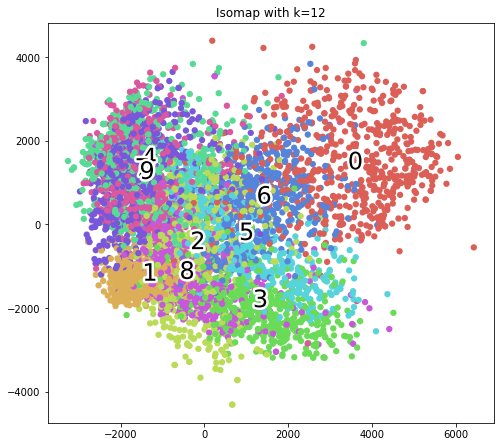

In [ ]:
#Implementing the Isomap Function using sklearn
# use k=12 for the cost function parameter as the original paper
Iso_digits_final = Isomap(n_neighbors=12).fit_transform(MNIST_x_train_reduced) 

# plot the visualized data graph using Isomap
plot(Iso_digits_final,MNIST_y_train,"Isomap with k=12")

#### LLE (locally linear embedding)
Complexity of LLE is O[Dlog(k)Nlog(N)]+O[DNk^3]+O[dN^2].

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.0010284071540912706, -0.006668867057526896, '0'),
  Text(-0.007087327527030439, 0.0006535009358253832, '1'),
  Text(0.0016750561941092056, -0.0010551062565887547, '2'),
  Text(-0.003759665260513209, -0.0015127856416905503, '3'),
  Text(0.0011868687598263958, 0.0037333651393771693, '4'),
  Text(-0.0015255861750670644, -0.0031131833449172066, '5'),
  Text(-0.0023073203802393624, -0.005321111362616681, '6'),
  Text(0.0045023322417235955, 0.00541233321171076, '7'),
  Text(0.002554438597183195, -0.004601390493710236, '8'),
  Text(0.000633119801277111, 0.007069335069686385, '9')])

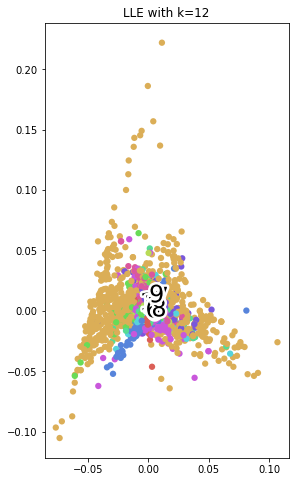

In [ ]:
#Implementing the LLE Function (LocallyLinearEmbedding) using sklearn
# use k=12 for the cost function parameter as the original paper
LLE_digits_final = LLE(n_neighbors=12).fit_transform(MNIST_x_train_reduced) 

# plot the visualized data graph using LLE
plot(LLE_digits_final,MNIST_y_train,"LLE with k=12")

#### UMAP
Extend the original paper by adding a comparison of t-SNE to UMAP, a new visualization method.

(<Figure size 576x576 with 1 Axes>,
 [Text(-2.8630345, 8.017909, '0'),
  Text(12.545091, 8.00466, '1'),
  Text(7.249354, 7.9217167, '2'),
  Text(4.5043826, 3.941197, '3'),
  Text(7.29378, -2.684235, '4'),
  Text(2.8892004, 5.3564534, '5'),
  Text(-1.137506, 4.110752, '6'),
  Text(10.600761, -2.1455936, '7'),
  Text(6.772889, 3.1204681, '8'),
  Text(8.503538, -2.8682551, '9')])

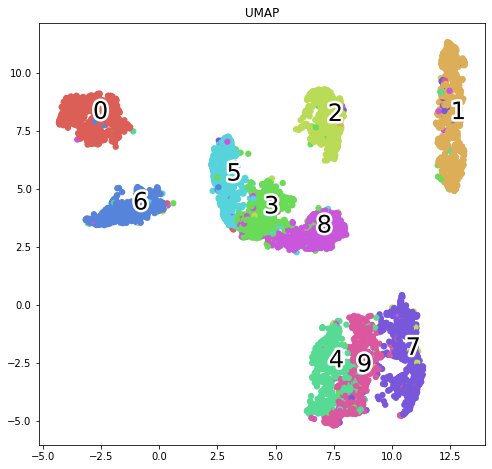

In [ ]:
# Compare to UMAP, new dimension visualization method

UMAP_reducer = umap.UMAP(random_state=42)
umap_final = UMAP_reducer.fit_transform(MNIST_x_train_reduced) 

# plot the visualized data graph using Isomap
plot(umap_final,MNIST_y_train,"UMAP")

### Task 2.2: Try different parameters
Do a thorough analysis of the model through an extensive set of experiments.  Explore how the model performs after you make minor modifications (e.g. changes to parameters/hyperparameters).

We found that the best was result was obtained from: `TSNE(perplexity=10,learning_rate=100,init='random',random_state=1234).fit_transform(MNIST_x_train_reduced)`.

perplexity: [0,100]
- the perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms
- different values can result in significantly different results.

learning_rate: [10,1000]
- if the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours
- if the learning rate is too low, most points may look compressed in a dense cloud with few outliers
- if the cost function gets stuck in a bad local minimum increasing the learning rate may help

init: {'random', 'pca'}
- initialization of embedding
- PCA is usually more globally stable than random initialization

n_iter: [100,1000]
- maximum number of iterations for the optimization

Not critical: early_exageration

#### Perplexity

(<Figure size 576x576 with 1 Axes>,
 [Text(-46.093555, 5.357354, '0'),
  Text(33.060078, -20.795458, '1'),
  Text(5.586833, -36.143658, '2'),
  Text(-19.799196, -19.701557, '3'),
  Text(9.608406, 24.657398, '4'),
  Text(-14.4660845, -0.0033081786, '5'),
  Text(-23.924109, 21.72738, '6'),
  Text(29.486395, 17.9158, '7'),
  Text(-0.17319328, -13.596172, '8'),
  Text(8.884378, 21.179508, '9')])

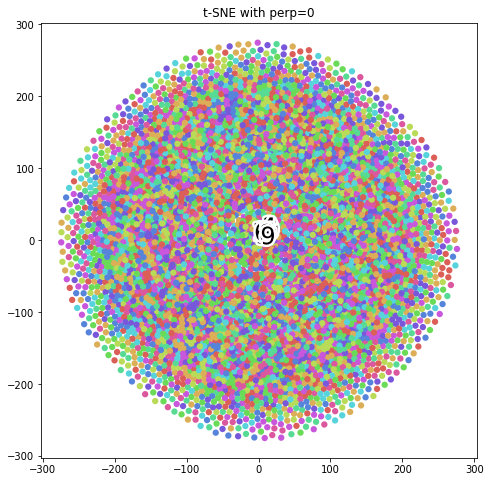

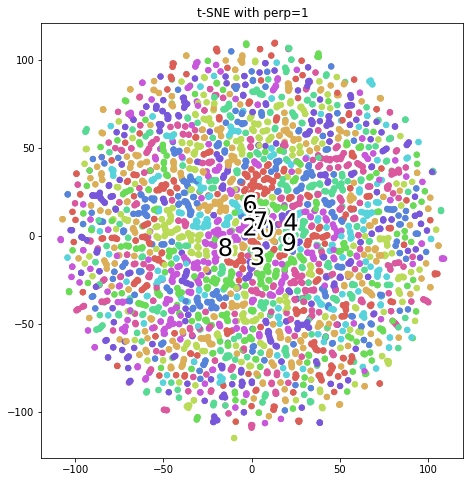

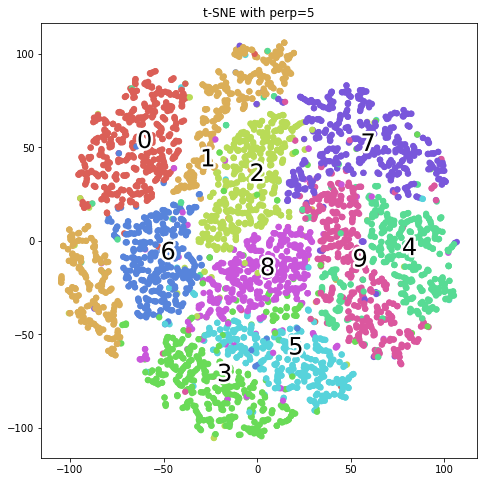

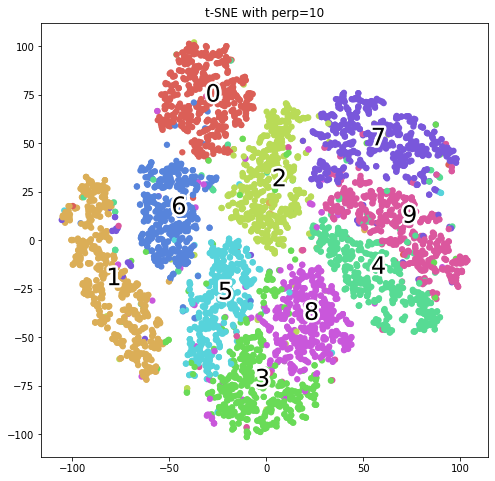

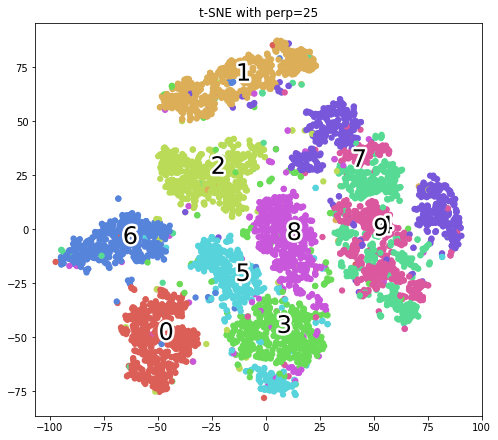

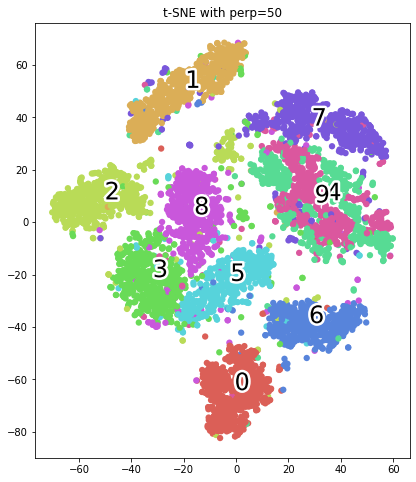

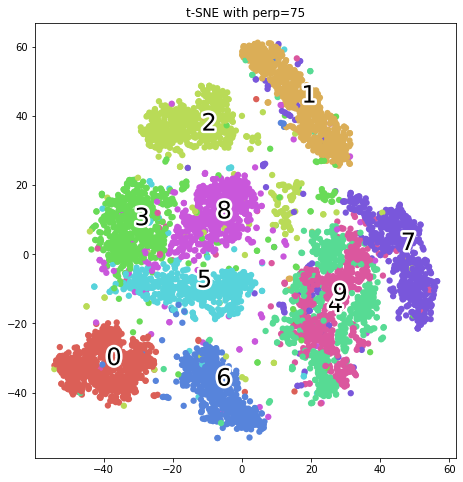

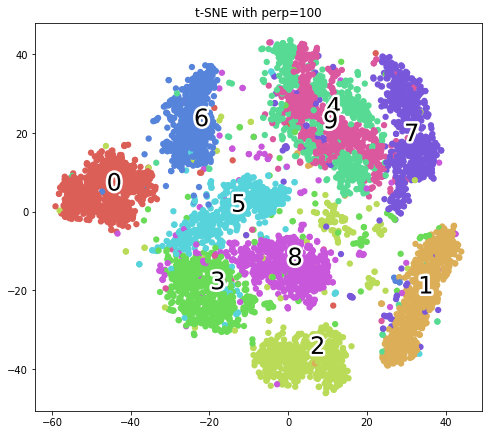

In [ ]:
# use perp=0 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=0,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=0")

# use perp=1 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=1,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=1")

# use perp=5 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=5,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=5")

# use perp=10 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=10,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=10")

# use perp=25 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=25,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=25")

# use perp=50 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=50,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=50")

# use perp=75 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=75,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=75")

# use perp=100 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=100,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=100")

(<Figure size 576x576 with 1 Axes>,
 [Text(-73.09654, -0.5808445, '0'),
  Text(-15.529878, 72.660065, '1'),
  Text(-18.698921, 25.900442, '2'),
  Text(7.696965, -55.591682, '3'),
  Text(54.784805, 7.1745696, '4'),
  Text(-21.572588, -31.133625, '5'),
  Text(-53.35072, -48.302853, '6'),
  Text(46.3508, 31.36015, '7'),
  Text(9.748589, -12.293105, '8'),
  Text(52.742958, -4.723654, '9')])

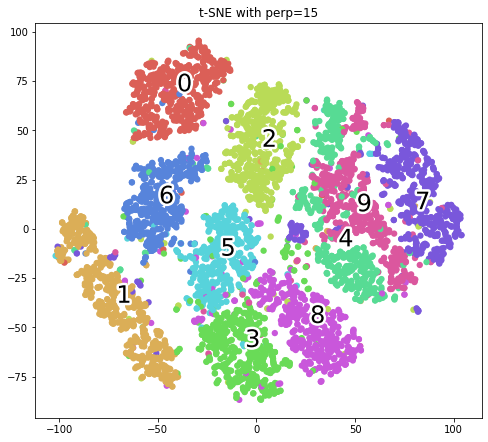

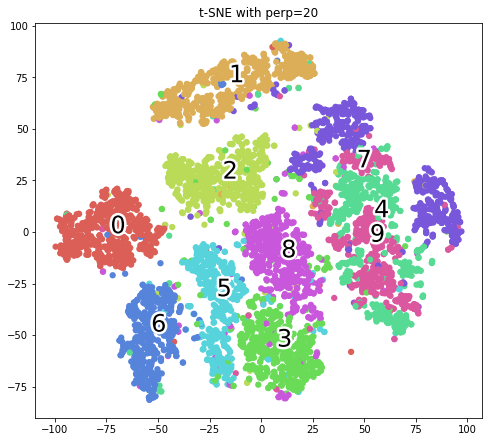

In [ ]:
# use perp=15 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=15,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=15")

# use perp=20 for the cost function parameter
TSNE_digits_final = TSNE(perplexity=20,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with perp=20")

#### Learning rate

(<Figure size 576x576 with 1 Axes>,
 [Text(29.053423, 76.566536, '0'),
  Text(81.039, 7.539931, '1'),
  Text(46.811478, -35.50473, '2'),
  Text(-46.813908, -47.665054, '3'),
  Text(-48.32403, 37.05961, '4'),
  Text(-25.460701, -88.09063, '5'),
  Text(-28.010553, 76.99538, '6'),
  Text(6.237905, -0.9713265, '7'),
  Text(7.3723655, -57.225445, '8'),
  Text(-31.9823, 14.012237, '9')])

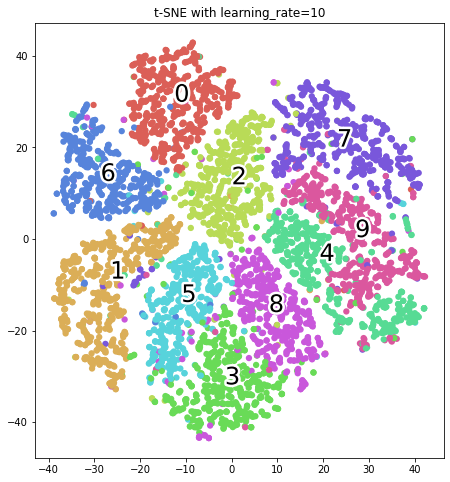

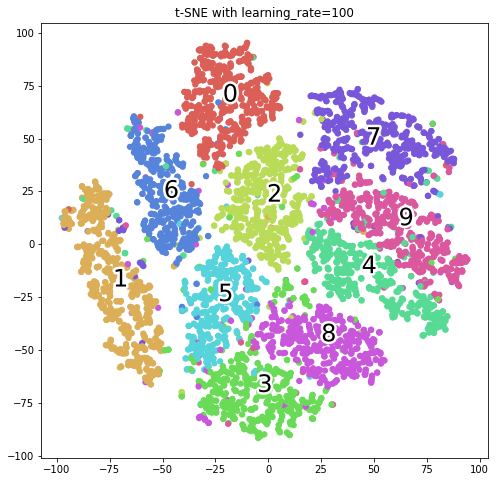

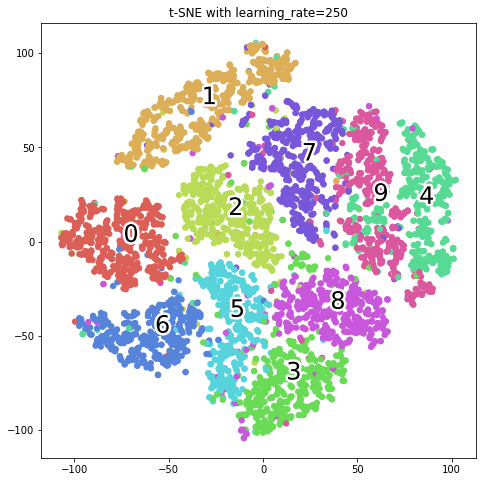

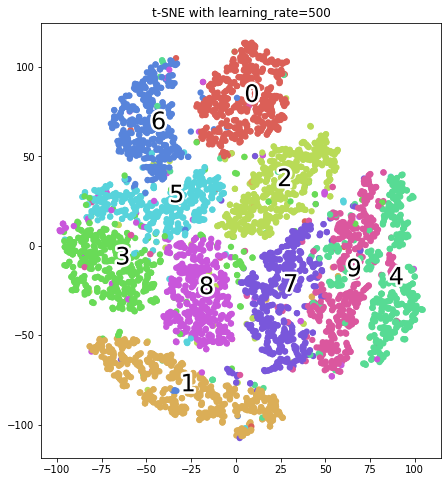

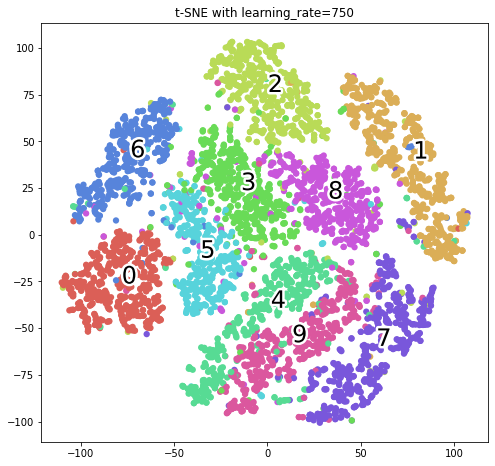

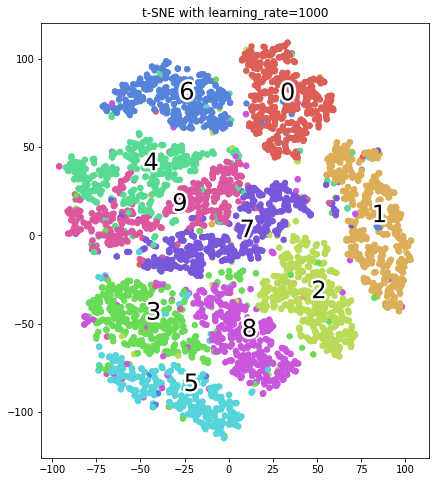

In [ ]:
# use learning_rate=10
TSNE_digits_final = TSNE(perplexity=10,learning_rate=10,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=10")

# use learning_rate=100
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=100")

# use learning_rate=250
TSNE_digits_final = TSNE(perplexity=10,learning_rate=250,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=250")

# use learning_rate=500
TSNE_digits_final = TSNE(perplexity=10,learning_rate=500,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=500")

# use learning_rate=750
TSNE_digits_final = TSNE(perplexity=10,learning_rate=750,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=750")

# use learning_rate=1000
TSNE_digits_final = TSNE(perplexity=10,learning_rate=1000,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=1000")

(<Figure size 576x576 with 1 Axes>,
 [Text(-6.010131, 75.19426, '0'),
  Text(-18.900106, -60.81483, '1'),
  Text(-61.340767, -11.90852, '2'),
  Text(-39.779373, 22.812761, '3'),
  Text(44.319283, -10.257156, '4'),
  Text(-4.2707543, 25.35127, '5'),
  Text(30.594791, 47.95942, '6'),
  Text(49.074177, -41.068424, '7'),
  Text(-20.645494, -8.2374115, '8'),
  Text(38.402496, -9.300936, '9')])

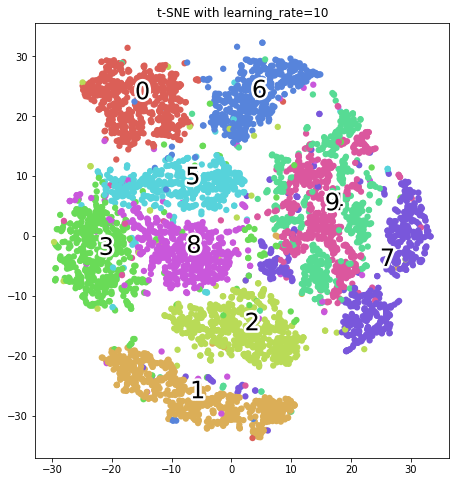

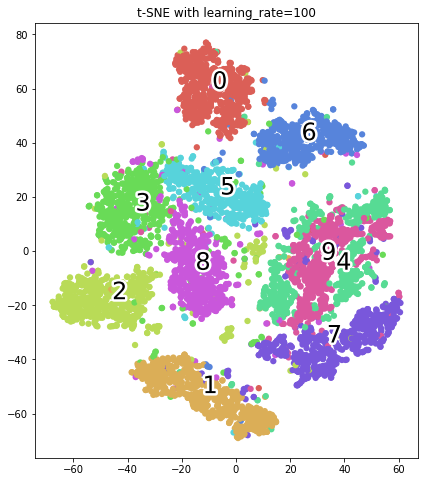

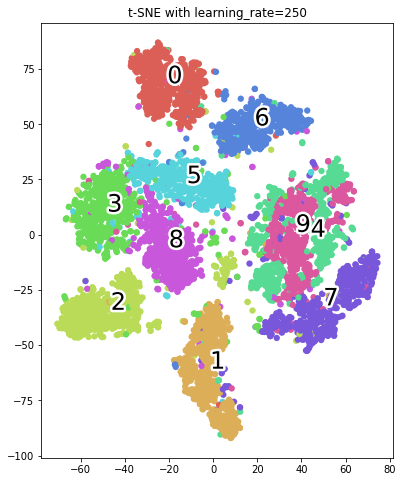

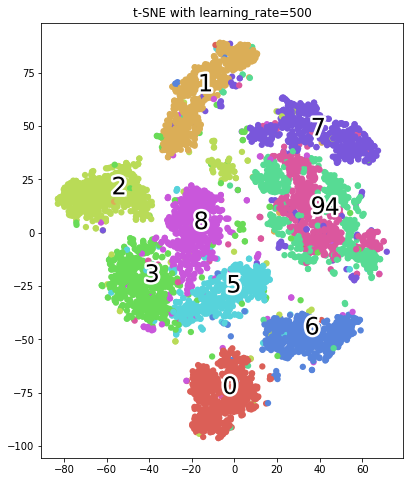

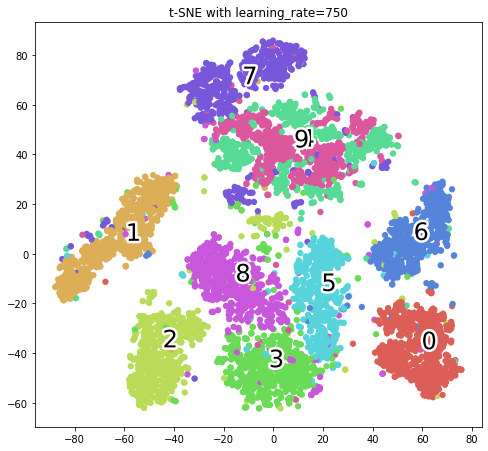

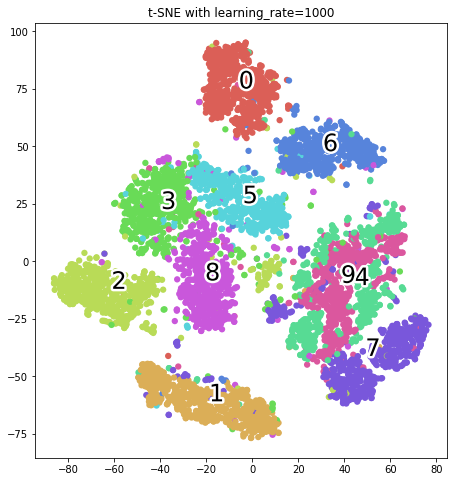

In [ ]:
# use learning_rate=10
TSNE_digits_final = TSNE(perplexity=40,learning_rate=10,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=10")

# use learning_rate=100
TSNE_digits_final = TSNE(perplexity=40,learning_rate=100,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=100")

# use learning_rate=250
TSNE_digits_final = TSNE(perplexity=40,learning_rate=250,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=250")

# use learning_rate=500
TSNE_digits_final = TSNE(perplexity=40,learning_rate=500,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=500")

# use learning_rate=750
TSNE_digits_final = TSNE(perplexity=40,learning_rate=750,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=750")

# use learning_rate=1000
TSNE_digits_final = TSNE(perplexity=40,learning_rate=1000,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with learning_rate=1000")

#### Initialization of embedding

(<Figure size 576x576 with 1 Axes>,
 [Text(1001.2152, 107.81897, '0'),
  Text(-860.5713, 437.9818, '1'),
  Text(63.068607, 253.51265, '2'),
  Text(103.17702, 590.4351, '3'),
  Text(-98.86663, -543.89996, '4'),
  Text(104.70576, 117.09475, '5'),
  Text(112.23933, -54.446312, '6'),
  Text(-308.68893, -602.38336, '7'),
  Text(-13.396491, 235.1241, '8'),
  Text(-193.261, -583.8269, '9')])

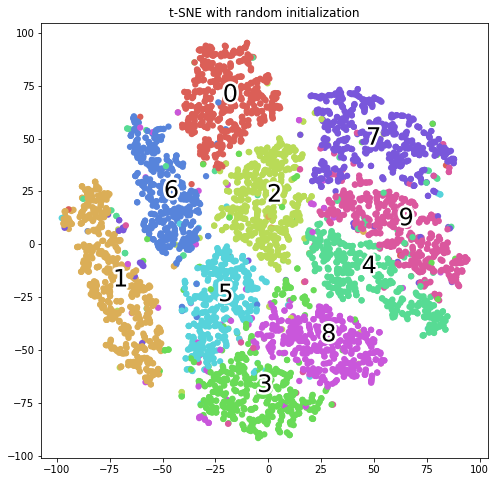

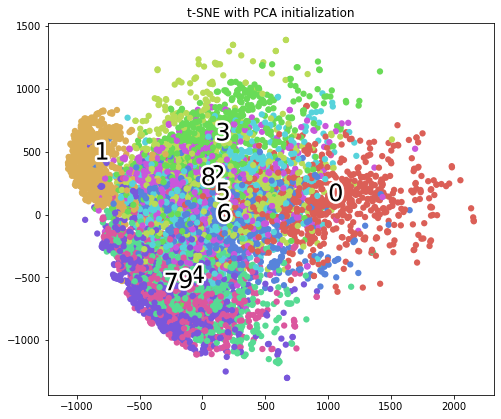

In [ ]:
# random initialization
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,init='random',random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with random initialization")

# pca initialization
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,init='pca',random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with PCA initialization")

#### Number of iterations

(<Figure size 576x576 with 1 Axes>,
 [Text(-23.001848, 78.05144, '0'),
  Text(-84.0274, -21.346096, '1'),
  Text(-0.6179737, 21.98957, '2'),
  Text(-5.9218626, -80.83649, '3'),
  Text(51.408764, -15.545865, '4'),
  Text(-25.83279, -31.135115, '5'),
  Text(-55.985886, 23.933723, '6'),
  Text(52.395233, 53.704117, '7'),
  Text(27.434315, -52.27866, '8'),
  Text(71.40488, 10.469042, '9')])

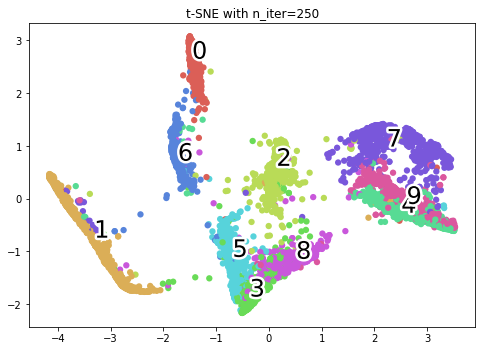

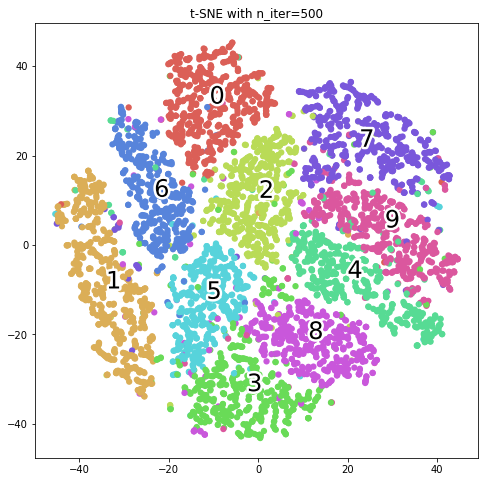

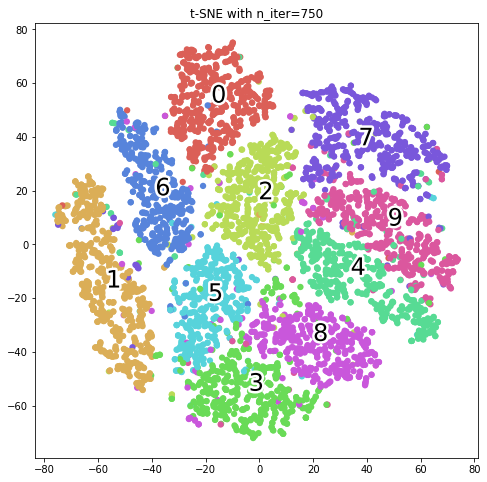

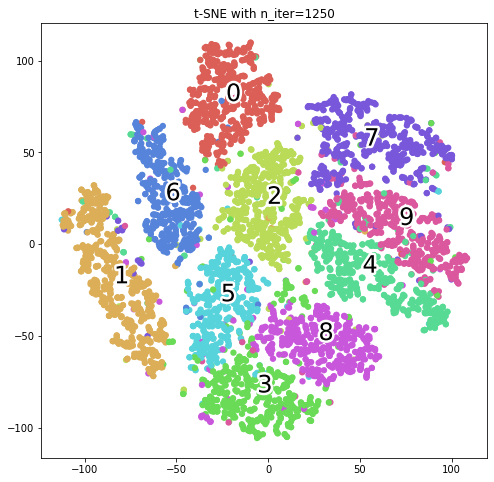

In [ ]:
# use perplexity=10, learning_rate=100, n_iter=250
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,n_iter=250,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with n_iter=250")

# use perplexity=10, learning_rate=100, n_iter=500
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,n_iter=500,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with n_iter=500")

# use perplexity=10, learning_rate=100, n_iter=750
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,n_iter=750,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with n_iter=750")

# use perplexity=10, learning_rate=100, n_iter=1250
TSNE_digits_final = TSNE(perplexity=10,learning_rate=100,n_iter=1250,random_state=1234).fit_transform(MNIST_x_train_reduced) 
plot(TSNE_digits_final,MNIST_y_train,"t-SNE with n_iter=1250")

### Task 2.3: Use another dataset

(<Figure size 576x576 with 1 Axes>,
 [Text(31.477978, -4.1571245, '0'),
  Text(-8.2776575, -2.2065806, '1'),
  Text(-14.285855, 20.385067, '2'),
  Text(2.2692683, 19.799297, '3'),
  Text(-10.435622, -19.566643, '4'),
  Text(10.271641, 0.4363165, '5'),
  Text(12.403822, -23.22552, '6'),
  Text(-24.063498, -2.9071279, '7'),
  Text(-5.921027, 6.304396, '8'),
  Text(9.440971, 12.676735, '9')])

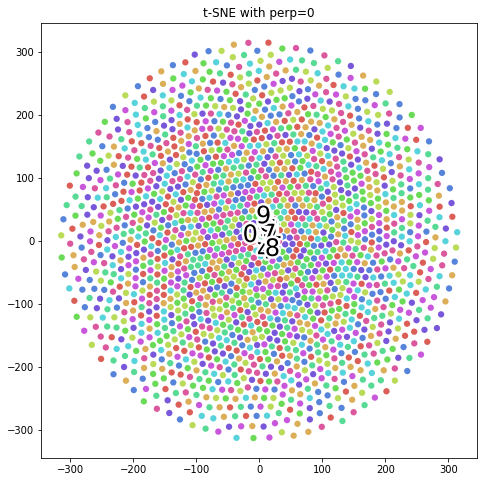

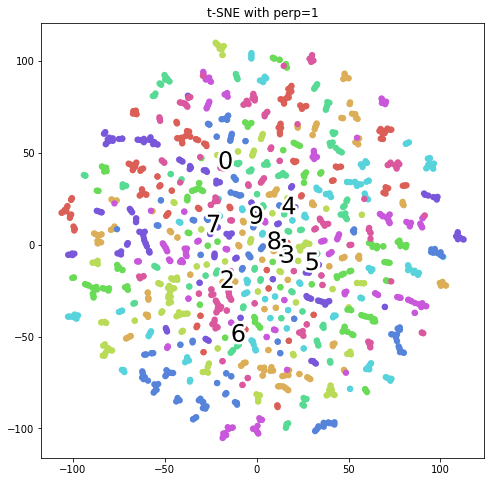

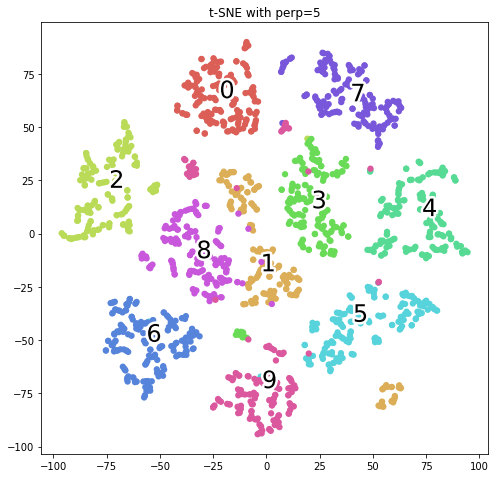

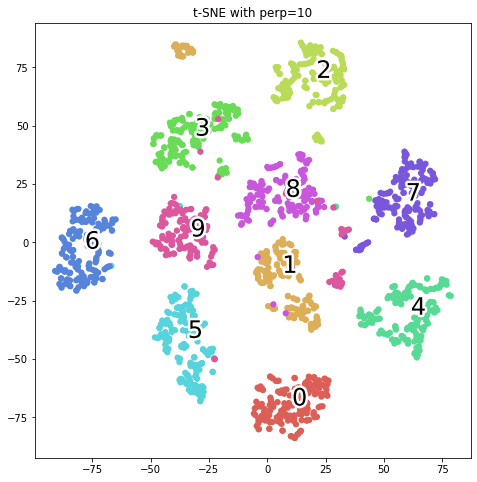

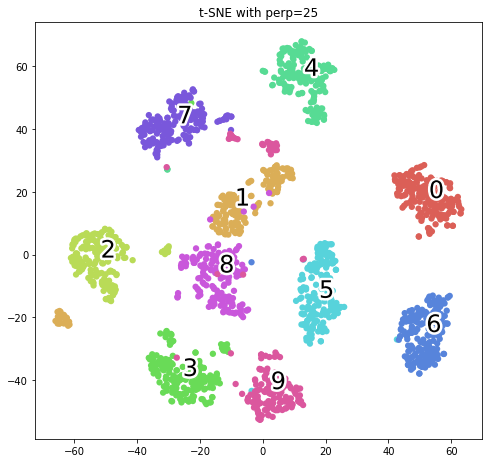

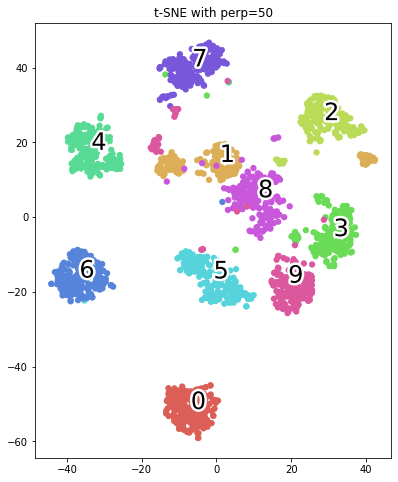

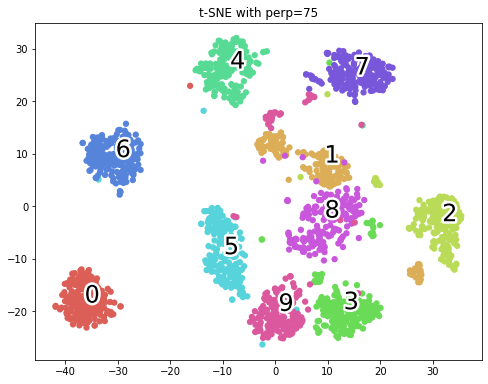

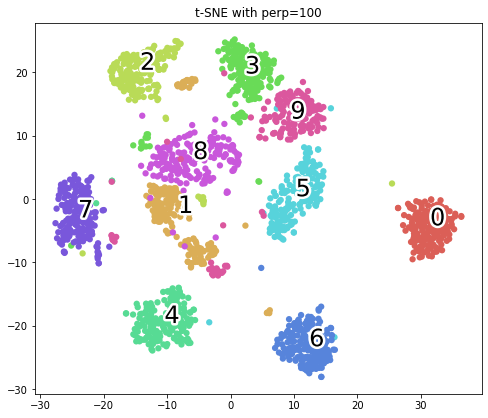

In [ ]:
digits = load_digits()

X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

# use perp=0,1,5,10,25,50,75,100
digits_final = TSNE(perplexity=0).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=0")

digits_final = TSNE(perplexity=1).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=1")

digits_final = TSNE(perplexity=5).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=5")

digits_final = TSNE(perplexity=10).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=10")

digits_final = TSNE(perplexity=25).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=25")

digits_final = TSNE(perplexity=50).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=50")

digits_final = TSNE(perplexity=75).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=75")

digits_final = TSNE(perplexity=100).fit_transform(X) 
plot(digits_final,Y, "t-SNE with perp=100")

### Task 2.4: Similarity matrix


In [ ]:
# computes the similarity with a constant (sigma)
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

In [ ]:
# compute the similarity with a sigma_i depending on the data point (found via a binary search, according to the original t-SNE paper)
# this algorithm is implemented in the _joint_probabilities private function in scikit-learn's code

# pairwise distances between all data points.
D = pairwise_distances(X, squared=True)
# similarity with constant sigma.
P_constant = _joint_probabilities_constant_sigma(D, .002)
# similarity with variable sigma.
P_binary = _joint_probabilities(D, 30., False)
# the output of this function needs to be reshaped to a square matrix.
P_binary_s = squareform(P_binary)

Text(0.5, 1.0, '$p_{j|i}$ (variable $\\sigma$)')

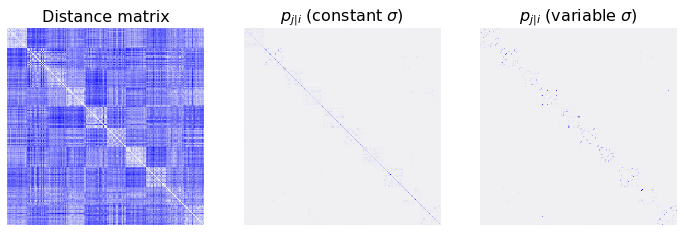

In [ ]:
# display the distance matrix of the data points, and the similarity matrix with both a constant and variable sigma
# we can already observe the 10 groups in the data, corresponding to the 10 numbers

plt.figure(figsize=(12, 4))
pal = sb.light_palette("blue", as_cmap=True)

plt.subplot(131)
plt.imshow(D[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("Distance matrix", fontdict={'fontsize': 16})

plt.subplot(132)
plt.imshow(P_constant[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (constant $\sigma$)", fontdict={'fontsize': 16})

plt.subplot(133)
plt.imshow(P_binary_s[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\sigma$)", fontdict={'fontsize': 16})

### Task 2.5: Decision tree + t-SNE

In [ ]:
def evaluate_acc(trueLabel, targetLabel):
    accuracy = np.sum(targetLabel == trueLabel)/trueLabel.shape[0] # calculate the accuracy
    return accuracy

def cross_validate_split(n, n_folds):
    # get the number of data samples in each split
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        # get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        # get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        # the yield statement suspends function’s execution and sends a value back to the caller
        # but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds

def kfoldCV(n, n_folds, x_train, y_train, model):       
    avg_acc = np.zeros(n_folds)
    
    for f, (tr, val) in enumerate(cross_validate_split(n, n_folds)):
        model.fit(x_train[tr], y_train[tr])
        y_pred = model.predict(x_train[val])
        # y_pred = np.argmax(y_prob,axis=-1)
        avg_acc[f] = evaluate_acc(y_train[val], y_pred)

    return avg_acc

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#data acquisition for t-SNE + decision tree and knn
(MNIST_x_train, MNIST_y_train), (MNIST_x_test, MNIST_y_test) = tf.keras.datasets.mnist.load_data()


# vectorize data to 2D: # of data x image pixels
MNIST_x_train_vec = MNIST_x_train.reshape(MNIST_x_train.shape[0], MNIST_x_train.shape[1] * MNIST_x_train.shape[2]).astype('float64')
MNIST_x_test_vec = MNIST_x_test.reshape(MNIST_x_test.shape[0], MNIST_x_test.shape[1] * MNIST_x_test.shape[2]).astype('float64')

# use PCA to reduce the dimensionality to 30 as the original paper
pca = PCA(n_components=30)
MNIST_x_train_reduced = pca.fit_transform(MNIST_x_train_vec)
MNIST_x_test_reduced = pca.fit_transform(MNIST_x_test_vec)


#apply TSNE reduction
TSNE_digits_test = TSNE(perplexity=30).fit_transform(MNIST_x_test_reduced)
TSNE_digits_train = TSNE(perplexity=30).fit_transform(MNIST_x_train_reduced)



KNN Acc  [0.9765     0.97441667 0.97441667 0.97383333 0.975     ]
DT Acc [0.9715     0.96816667 0.96741667 0.96866667 0.96891667]


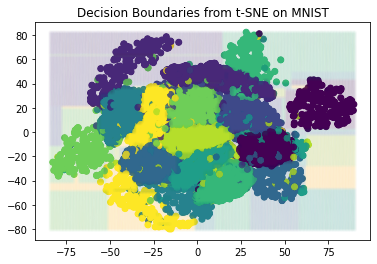

In [ ]:
import random as rn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
seed = rn.randint(1,1000) 

#FULL MNIST SET tSNE embedded
TSNE_X = np.concatenate([TSNE_digits_test, TSNE_digits_train], axis=0)
Y = np.concatenate([MNIST_y_test, MNIST_y_train], axis=0)


n = TSNE_digits_train.shape[0]

#KNN + tSNE
knn = KNeighborsClassifier()
print('KNN Acc ', kfoldCV(n, 5, TSNE_digits_train, MNIST_y_train, knn))


#DECISION TREE + tSNE
dt = DecisionTreeClassifier(max_depth=10, random_state=seed)
print('DT Acc', kfoldCV(n, 5, TSNE_digits_train, MNIST_y_train, dt))

x_train, x_test, y_train, y_test = train_test_split(TSNE_X, Y, test_size=.2, random_state=seed)

#PRINT DECISION BOUNDARY
x0v = np.linspace(np.min(TSNE_X[:,0]), np.max(TSNE_X[:,0]), 200)
x1v = np.linspace(np.min(TSNE_X[:,1]), np.max(TSNE_X[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

y_train_prob = np.zeros((y_train.shape[0], 10))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = dt.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.02)
plt.title('Decision Boundaries from t-SNE on MNIST')
plt.show()


In [ ]:
umap_x_train = UMAP_reducer.fit_transform(MNIST_x_train_reduced) 

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
print('UMAP DT Acc ', kfoldCV(n, 5, umap_x_train, MNIST_y_train, dt))

knn = KNeighborsClassifier()
print('KNN Acc ', kfoldCV(n, 5, umap_x_train, MNIST_y_train, knn))

UMAP DT Acc  [0.971      0.96958333 0.96716667 0.9655     0.97091667]
KNN Acc  [0.97216667 0.97241667 0.96941667 0.96983333 0.97283333]
